In [6]:
# Imports  necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [7]:
# Collecting Data from yfinance at specific dates
start = '2020-01-01'
end = '2023-12-21'
stock = 'GOOG'
data = yf.download(stock, start, end)
data.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [8]:
print(data.head(20))  # print the first 20 data

         Date       Open       High        Low      Close  Adj Close    Volume
0  2020-01-02  67.077499  68.406998  67.077499  68.368500  68.368500  28132000
1  2020-01-03  67.392998  68.625000  67.277199  68.032997  68.032997  23728000
2  2020-01-06  67.500000  69.824997  67.500000  69.710503  69.710503  34646000
3  2020-01-07  69.897003  70.149498  69.518997  69.667000  69.667000  30054000
4  2020-01-08  69.603996  70.579002  69.542000  70.216003  70.216003  30560000
5  2020-01-09  71.028503  71.366501  70.513496  70.991501  70.991501  30018000
6  2020-01-10  71.377998  71.746452  70.917503  71.486504  71.486504  36414000
7  2020-01-13  71.806503  72.026001  71.301003  71.961502  71.961502  33046000
8  2020-01-14  71.950500  72.089996  71.418503  71.543999  71.543999  31178000
9  2020-01-15  71.510498  72.069748  71.510498  71.959999  71.959999  25654000
10 2020-01-16  72.372002  72.599503  72.045998  72.584999  72.584999  23474000
11 2020-01-17  73.145500  74.064751  72.911003  74.0

In [9]:
print(data.tail(10))    # print the last 10 data

          Date        Open        High         Low       Close   Adj Close  \
990 2023-12-07  136.600006  140.000000  136.229996  138.449997  138.449997   
991 2023-12-08  135.660004  137.990005  135.570007  136.639999  136.639999   
992 2023-12-11  133.820007  134.789993  132.889999  134.699997  134.699997   
993 2023-12-12  133.270004  134.539993  132.830002  133.639999  133.639999   
994 2023-12-13  134.544998  134.779999  132.949997  133.970001  133.970001   
995 2023-12-14  134.770004  135.035004  131.059998  133.199997  133.199997   
996 2023-12-15  132.919998  134.830002  132.630005  133.839996  133.839996   
997 2023-12-18  133.860001  138.380005  133.770004  137.190002  137.190002   
998 2023-12-19  138.000000  138.770004  137.449997  138.100006  138.100006   
999 2023-12-20  140.330002  143.078003  139.410004  139.660004  139.660004   

       Volume  
990  38419400  
991  22990900  
992  24502900  
993  26584000  
994  25414500  
995  29619100  
996  58569400  
997  25699800

In [10]:
print(data.info())  # Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1000 non-null   datetime64[ns]
 1   Open       1000 non-null   float64       
 2   High       1000 non-null   float64       
 3   Low        1000 non-null   float64       
 4   Close      1000 non-null   float64       
 5   Adj Close  1000 non-null   float64       
 6   Volume     1000 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 54.8 KB
None


In [11]:
print(data.describe())    # five number Summary

                             Date         Open         High          Low  \
count                        1000  1000.000000  1000.000000  1000.000000   
mean   2021-12-26 03:33:07.200000   108.247805   109.558277   107.078559   
min           2020-01-02 00:00:00    52.825500    53.566002    50.676800   
25%           2020-12-28 18:00:00    88.204000    89.151375    87.266874   
50%           2021-12-25 00:00:00   109.745251   111.921501   108.160000   
75%           2022-12-21 06:00:00   131.187626   132.624687   129.870003   
max           2023-12-20 00:00:00   151.863495   152.100006   149.887497   
std                           NaN    25.432384    25.537089    25.256638   

             Close    Adj Close        Volume  
count  1000.000000  1000.000000  1.000000e+03  
mean    108.339090   108.339090  2.942642e+07  
min      52.831001    52.831001  6.936000e+06  
25%      88.189125    88.189125  2.094408e+07  
50%     110.365250   110.365250  2.625900e+07  
75%     131.254124   131.25

In [12]:
# Initializing Independent and Dependent variables X and y respectively
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close'].values

In [13]:
# Split the dataset into training and testing sets
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Checking the data is correctly splitted into respective ratios
print(len(X_train))
print(len(y_test))

800
200


In [15]:
# Standardize the features for better model performances and equalize the scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Create a linear regression model
model = LinearRegression()

In [17]:
# Train the model on the scaled training set
model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

In [19]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse*(100),3),"%")

Mean Squared Error: 66.499 %


In [20]:
# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', round(mae*(100),3),"%")

Mean Absolute Error: 61.841 %


In [21]:
# Evaluate the model using Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', round(rmse*(100),3),"%")

Root Mean Squared Error: 81.547 %


In [22]:
# Evaluate the model using r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score is :",r2)

r2 score is : 0.9988742121754125


In [25]:
# Creating the dataframe for Actual and Predicted values
results=pd.DataFrame({'Actual price':y_test,'predicted price':y_pred})

In [26]:
print(results)

     Actual price  predicted price
0      129.240005       129.597272
1       99.870003       101.030189
2       93.949997        94.315305
3      122.510002       122.417172
4      136.913498       136.976910
..            ...              ...
195    138.916000       137.304236
196    118.995499       120.868320
197     75.831001        76.243186
198    117.237999       118.167231
199     63.965500        63.397153

[200 rows x 2 columns]


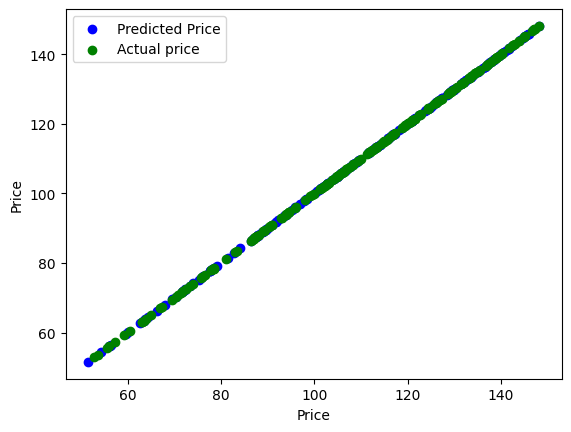

In [39]:
# Plots for Visualization Scatter

plt.scatter(results['predicted price'],results['predicted price'],label='Predicted Price',color='b')
plt.scatter(results['Actual price'],results['Actual price'],label='Actual price',color='g')
plt.xlabel("Price")
plt.ylabel("Price")
plt.legend()
plt.show()

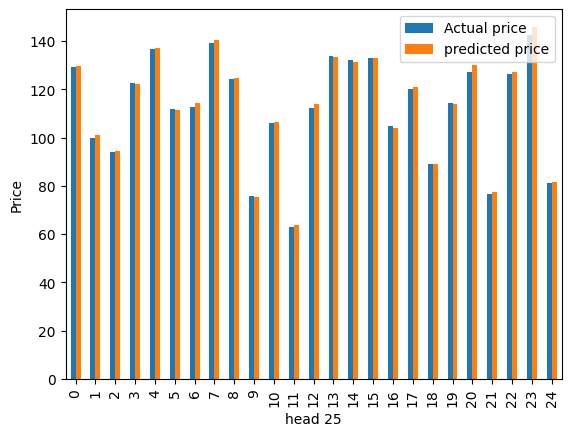

In [34]:
# Plots for Visualization Bar

graph=results.head(25)
graph.plot(kind='bar')
plt.xlabel("head 25")
plt.ylabel("Price")
plt.show()

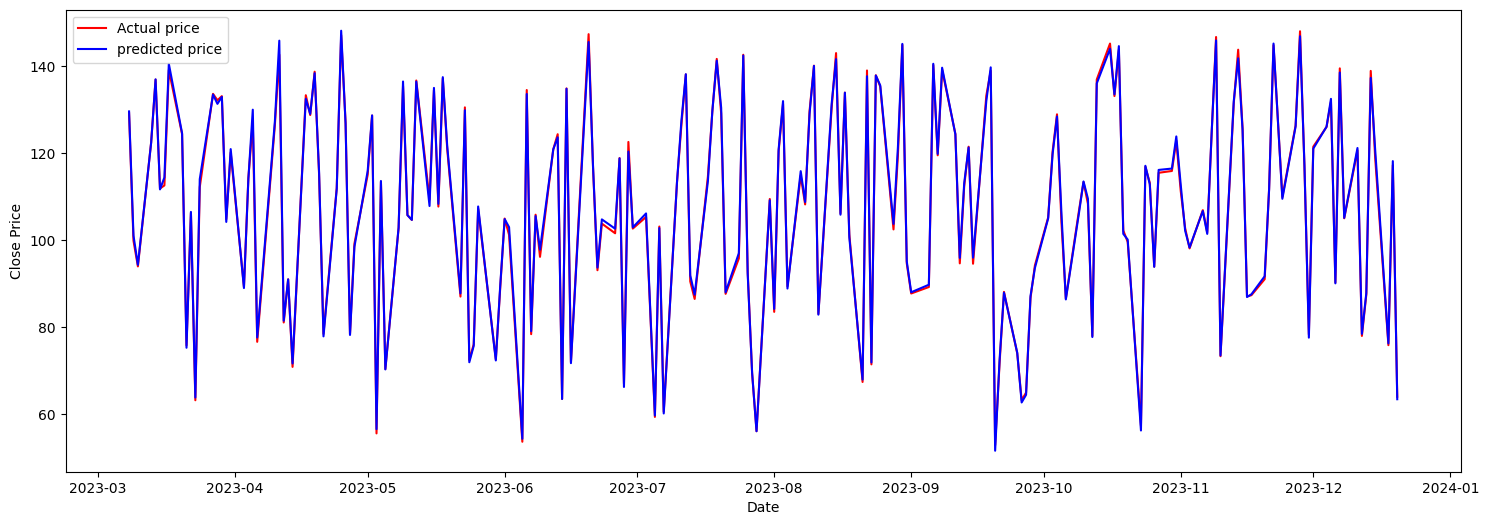

In [42]:
# Plots for Visualization Line

fig=plt.figure(figsize=(18,6))
plt.plot(data['Date'].tail(200),results['Actual price'],label='Actual price',color='r')
plt.plot(data['Date'].tail(200),results['predicted price'],label='predicted price',color='b')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()